In [1]:
from PIL import Image
import requests
from io import BytesIO

In [2]:
url_3 = "https://static.zara.net/photos///2024/V/0/3/p/5767/521/712/2/w/2048/5767521712_6_1_1.jpg?ts=1707751045954"

response = requests.get(url_3)
img = Image.open(BytesIO(response.content))

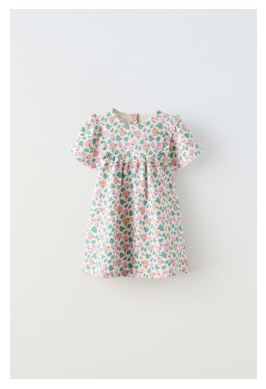

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def display_image(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
display_image(np.array(img))

In [6]:
# Get the image urls
file_path = 'inditex_img\inditextech_hackupc_challenge_images.csv'

with open(file_path, 'r') as file:
    content = file.read()

urls_1 = content.split('\n')[1:]

urls = [url.split(',') for url in urls_1]

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Ignasi\AppData\Local\Temp\ipykernel_5812\2628185352.py:2: SyntaxWarning: invalid escape sequence '\i'
  file_path = 'inditex_img\inditextech_hackupc_challenge_images.csv'


In [7]:
for i in range(len(urls)):
    for j in range(3):
        url = urls[i][j]
        url = url.replace('"', '') 
        # Verificar si la URL tiene un esquema válido
        if not url.startswith('http://') and not url.startswith('https://'):
            # Si no tiene un esquema válido, agregar 'http://' como predeterminado
            url = 'http://' + url
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))

MissingSchema: Invalid URL '': No scheme supplied. Perhaps you meant https://?

In [ ]:
# Obtener las URLs por año
urls_por_año = {}
urls_por_season = {}
urls_por_product = {}
urls_por_section = {}

for url_set in urls: 
    for url in url_set: 
        if(url == ""):
            continue
        # Obtener el año de la URL
        año = url.split('/')[6]
        # Obtener las seasons de la URL
        season = url.split('/')[7]
        # Obtener los productos de la URL
        products = url.split('/')[8]
        # Obtener las imagenes de la URL
        section = url.split('/')[9]

        # Eliminar las URLs que no tienen un año de la lista, eso quiere decir que no siguen el formato o incluso que la URL está mal escrita
        if len(año) != 4:
            # Eliminar la fila url_set de la lista de URLs
            print("URL eliminada: ", url_set)
            urls.remove(url_set)
            continue

        # Agregar la URL al diccionario correspondiente al año
        if año not in urls_por_año:
            urls_por_año[año] = []
        urls_por_año[año].append(url.replace('"', ''))

        # Obtener las seasons de la URL
        if season not in urls_por_season:
            urls_por_season[season] = []
        urls_por_season[season].append(url.replace('"', ''))

        # Obtener los productos de la URL
        if products not in urls_por_product:
            urls_por_product[products] = []
        urls_por_product[products].append(url.replace('"', ''))

        # Obtener las sections de la URL
        if section not in urls_por_section:
            urls_por_section[section] = []
        urls_por_section[section].append(url.replace('"', ''))

URL eliminada:  ['"https://static.zara.net/photos///assets/public/d0e3/6e32/8e4f44abb92a/f08cb847754e/15455310001-e4/w/2048/15455310001-e4.jpg?ts=1710957668904"', '"https://static.zara.net/photos///assets/public/7c49/cef9/f1c44238a43c/ca8d0d4af40e/15455310001-e2/w/2048/15455310001-e2.jpg?ts=1710957669100"', '"https://static.zara.net/photos///2024/V/1/1/p/5455/310/001/2/w/2048/5455310001_3_1_1.jpg?ts=1710957659680"']
URL eliminada:  ['"https://static.zara.net/photos///assets/public/d0e3/6e32/8e4f44abb92a/f08cb847754e/15455310001-e4/w/2048/15455310001-e4.jpg?ts=1710957668904"', '"https://static.zara.net/photos///assets/public/7c49/cef9/f1c44238a43c/ca8d0d4af40e/15455310001-e2/w/2048/15455310001-e2.jpg?ts=1710957669100"', '"https://static.zara.net/photos///2024/V/1/1/p/5455/310/001/2/w/2048/5455310001_3_1_1.jpg?ts=1710957659680"']


ValueError: list.remove(x): x not in list

Hemos eliminado las urls que no tenian un año correcto, por lo que eran urls obsoletas sin metadatos. 

In [ ]:
elementos_por_key = {key: len(value) for key, value in urls_por_año.items()}
elementos_por_key


Vemos que hay metadatos que indican la misma estación, puede que a partir de un año se decidiera cambiar la nomenclatura

In [ ]:
elementos_por_key = {key: len(value) for key, value in urls_por_season.items()}
elementos_por_key

0 -> ropa

1 -> complementos

2 -> makeup

4 -> home

In [ ]:
elementos_por_key = {key: len(value) for key, value in urls_por_product.items()}
elementos_por_key


1 -> mujer

2 -> hombre

3 -> kids

In [ ]:
elementos_por_key = {key: len(value) for key, value in urls_por_section.items()}
elementos_por_key

Lo que haremos ahora será explorar la relación entre metadatas.
- Todo el makeup está asociado con mujer?
- Todo Zara home está asociado con algo en conreto?
- etc

In [ ]:
urls_por_season_product = {}   

for season, urls in urls_por_season.items():
    if season == 'V':
        continue

    for url in urls:
        # Obtener el año de la URL
        año = url.split('/')[6]
        # Obtener las seasons de la URL
        season = url.split('/')[7]
        # Obtener los productos de la URL
        products = url.split('/')[8]
        # Obtener las imagenes de la URL
        section = url.split('/')[9]

        # Agregar la URL al diccionario correspondiente al año
        if products not in urls_por_season_product:
            urls_por_season_product[products] = []

        urls_por_season_product[products].append(url.replace('"', ''))

No hay una relación claro entre seasons y productos

In [ ]:
elementos_por_key = {key: len(value) for key, value in urls_por_season_product.items()}
elementos_por_key

In [ ]:
urls_por_product_section = {}

for product, urls in urls_por_product.items():
    if product == '0':
        for url in urls:
            # Obtener el año de la URL
            año = url.split('/')[6]
            # Obtener las seasons de la URL
            season = url.split('/')[7]
            # Obtener los productos de la URL
            products = url.split('/')[8]
            # Obtener las imagenes de la URL
            section = url.split('/')[9]

            # Agregar la URL al diccionario correspondiente al año
            if section not in urls_por_product_section:
                urls_por_product_section[section] = []

            urls_por_product_section[section].append(url.replace('"', ''))

Product = 0:



In [ ]:
elementos_por_key = {key: len(value) for key, value in urls_por_product_section.items()}
elementos_por_key

In [ ]:
urls_por_product_section = {}

for product, urls in urls_por_product.items():
    if product == '1':
        for url in urls:
            # Obtener el año de la URL
            año = url.split('/')[6]
            # Obtener las seasons de la URL
            season = url.split('/')[7]
            # Obtener los productos de la URL
            products = url.split('/')[8]
            # Obtener las imagenes de la URL
            section = url.split('/')[9]

            # Agregar la URL al diccionario correspondiente al año
            if section not in urls_por_product_section:
                urls_por_product_section[section] = []

            urls_por_product_section[section].append(url.replace('"', ''))

El producto 2 está distribuido entre todas las clases

In [ ]:
elementos_por_key = {key: len(value) for key, value in urls_por_product_section.items()}
elementos_por_key

In [ ]:
urls_por_product_section = {}

for product, urls in urls_por_product.items():
    if product == '2':
        for url in urls:
            # Obtener el año de la URL
            año = url.split('/')[6]
            # Obtener las seasons de la URL
            season = url.split('/')[7]
            # Obtener los productos de la URL
            products = url.split('/')[8]
            # Obtener las imagenes de la URL
            section = url.split('/')[9]

            # Agregar la URL al diccionario correspondiente al año
            if section not in urls_por_product_section:
                urls_por_product_section[section] = []

            urls_por_product_section[section].append(url.replace('"', ''))

El product 3 está mayoritariamente relacionado a mujeres

In [ ]:
elementos_por_key = {key: len(value) for key, value in urls_por_product_section.items()}
elementos_por_key

Todo el product 4 está asociado a mujeres

In [ ]:
urls_por_product_section = {}

for product, urls in urls_por_product.items():
    if product == '4':
        for url in urls:
            # Obtener el año de la URL
            año = url.split('/')[6]
            # Obtener las seasons de la URL
            season = url.split('/')[7]
            # Obtener los productos de la URL
            products = url.split('/')[8]
            # Obtener las imagenes de la URL
            section = url.split('/')[9]

            # Agregar la URL al diccionario correspondiente al año
            if section not in urls_por_product_section:
                urls_por_product_section[section] = []

            urls_por_product_section[section].append(url.replace('"', ''))

In [ ]:
elementos_por_key = {key: len(value) for key, value in urls_por_product_section.items()}
elementos_por_key

Tenemos una lista con los sets llamada urls, doncs en la [i] hay diferentes sets y en la [j] hay las diferentes imagenes del set. Queremos comprovar si todos los sets comparten los mismos metadatos.

In [ ]:

for url_list in urls:
    year = []
    season = []
    product = []
    section = []
    for url in url_list:
        if url == "":
            continue
        year.append(url.split('/')[6])
        season.append(url.split('/')[7])
        product.append(url.split('/')[8])
        section.append(url.split('/')[9])
    # if len(set(year)) != 1:
        # print('Error in year')
    #if len(set(season)) != 1:
        #print(url_list)
        #print('Error in season')
    #if len(set(product)) != 1:
        # print('Error in product')
    #if len(set(section)) != 1:
        #print('Error in section')


['"https://static.zara.net/photos///2024/V/0/1/p/4231/550/676/202/w/2400/4231550676_6_1_1.jpg?ts=1707403480306"', '"https://static.zara.net/photos///2024/V/0/1/p/4231/550/676/202/w/2400/4231550676_6_2_1.jpg?ts=1707403582621"', '"https://static.zara.net/photos///2024/V/0/2/p/4231/450/676/2/w/2400/4231450676_3_1_1.jpg?ts=1707387434979"']
Error in section
['"https://static.zara.net/photos///assets/public/d0e3/6e32/8e4f44abb92a/f08cb847754e/15455310001-e4/w/2048/15455310001-e4.jpg?ts=1710957668904"', '"https://static.zara.net/photos///assets/public/7c49/cef9/f1c44238a43c/ca8d0d4af40e/15455310001-e2/w/2048/15455310001-e2.jpg?ts=1710957669100"', '"https://static.zara.net/photos///2024/V/1/1/p/5455/310/001/2/w/2048/5455310001_3_1_1.jpg?ts=1710957659680"']
Error in section
['"https://static.zara.net/photos///2024/V/0/1/p/1213/605/406/2/w/1365/1213605406_6_1_1.jpg?ts=1709547451249"', '"https://static.zara.net/photos///2024/V/0/1/p/1213/605/406/2/w/1365/1213605406_6_2_1.jpg?ts=1709547451288"', '

Hay sets que no corresponden al mismo año!

Hay seasons que no corresponden, de repente una es verano y otra de invierno

Los productos siempre corresponden! Aunque hay articulos sin catalogar or hidden!

Las secciones no corresponden en algunos casos. 

## DATA CLEANING

In [ ]:
# Get the image urls
file_path = 'inditex_img\inditextech_hackupc_challenge_images.csv'

with open(file_path, 'r') as file:
    content = file.read()

urls_1 = content.split('\n')[1:]

urls = [url.split(',') for url in urls_1]

Hemos descubierto unos metadatos que separan en formato de imagen:

X_X_X

El primer elemento tiene que ver con el background:
- 1: 
- 2:
- 3:
- 6: